# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data



In [2]:
a=housing_features.tolist()
b=[]
for i in a:
    b.append(i)

In [3]:
len(housing_features)

506

In [4]:
CLIENT_FEATURES[0]

[11.95,
 0.0,
 18.1,
 0,
 0.659,
 5.609,
 90.0,
 1.385,
 24,
 680.0,
 20.2,
 332.09,
 12.13]

# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [5]:
# Number of houses in the dataset
total_houses = len(housing_prices)

# Number of features in the dataset
total_features = len(CLIENT_FEATURES[0])

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **CRIM(value:11.95): per capita crime rate by town -->>Because more the crime,less livable is the neighbourhod hence the house prices will be lower.INDUS(value:18.1): proportion of non-retail business acres per town-->>More INDUS,more developed the neighbourhood,more the house price,consequently. LSTAT(value:12.13):% lower status of the population-->>More this %,more less income people live in the area poiting to the fact that the area is cheaper enough where the low income people can afford to buy house.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [6]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **CRIM(value:11.95): per capita crime rate by town INDUS(value:18.1): proportion of non-retail business acres per town LSTAT(value:12.13):% lower status of the population

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [7]:
import random


In [8]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    lis=range(0,506)
    lis=random.sample(lis, len(lis))
    X = [ X[i] for i in lis]
    y = [ y[i] for i in lis]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **The train partition helps build our model and the test partition helps to provide us honest assessments of the performance of our predictive models.Hence to avoid overfitting,have possibly optimum performance of our model and simulate real life data that our model may encounter.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [9]:
import sklearn.metrics as metrics

In [10]:
# Put any import statements you need for this code block here
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    #error = metrics.accuracy_score(y_true, y_predict)
    #error= metrics.precision_score(y_true, y_predict)
    #error= metrics.recall_score(y_true, y_predict)
    #error= metrics.f1_score(y_true, y_predict)
    #error= metrics.mean_absolute_error(y_true, y_predict)
    error= metrics.mean_squared_error(y_true, y_predict)
    return error



total_error = performance_metric(y_train, y_train)
print total_error


0.0


In [11]:
y_train

[10.199999999999999,
 19.199999999999999,
 31.699999999999999,
 34.899999999999999,
 21.699999999999999,
 20.699999999999999,
 19.300000000000001,
 19.0,
 24.600000000000001,
 9.5999999999999996,
 19.399999999999999,
 19.600000000000001,
 21.199999999999999,
 19.600000000000001,
 22.0,
 24.800000000000001,
 23.800000000000001,
 21.399999999999999,
 18.899999999999999,
 28.0,
 29.0,
 16.100000000000001,
 24.300000000000001,
 7.0,
 18.399999999999999,
 19.5,
 16.600000000000001,
 10.9,
 19.399999999999999,
 21.0,
 20.800000000000001,
 22.199999999999999,
 28.699999999999999,
 15.4,
 28.699999999999999,
 17.800000000000001,
 22.600000000000001,
 25.300000000000001,
 10.800000000000001,
 22.0,
 20.300000000000001,
 19.899999999999999,
 21.899999999999999,
 19.899999999999999,
 17.800000000000001,
 33.200000000000003,
 13.4,
 15.6,
 23.100000000000001,
 8.0999999999999996,
 29.600000000000001,
 17.199999999999999,
 13.800000000000001,
 26.399999999999999,
 15.4,
 15.0,
 20.300000000000001,


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **In many circumstances it makes sense to give more weight to points further away from the mean--that is, being off by 10 is more than twice as bad as being off by 5. In such cases MSE is a more appropriate measure of error and hence I chose MSE.Also only MSE and MAE can be used for our model as only they support continuos multi output data.The rest of the metrics that are:-accuracy,precision,recall and F1 score are not suitable for continuos multioutput data

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [19]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(metrics.mean_squared_error,greater_is_better = False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters,error_score=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print reg
except:
    print "Something went wrong with fitting a model."

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **In the context of machine learning, hyperparameter optimization or model selection is the problem of choosing a set of hyperparameters for a learning algorithm, usually with the goal of optimizing a measure of the algorithm's performance on an independent data set.The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm.

It unfortunately suffers from the curse of dimesionality so,it can only be used when we have not very high dimensional data.
With a gridsearch you just try a set of values for your parameters and look at which value the objective function is largest (or smallest). Lets say you have one parameter and want to try for the values $1, 2, 3, 4, 5, 6, 7, 8, 9, 10$. (this is not realistic, normally you try many more possible values). In this example you need to compute the objective function 10 times.

Lets say there is a second parameter. Now you need to try the values: 

$(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,10), (2,1), (2,2), (2,3), (2,4), (2, 5), (2,6), (2,7), (2,8), (2,9), (2,10), \cdots , (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9), (10,10)$. 

So now you need to compute the objective function $10 \times 10 = 100$ times. If you have a third parameter you would end up with $10^3=1000$ evaluations, etc. 

If we use a more realist number of tries per parameter, say 1000, then we end up with a $1000^1=1000$ evaluations for one parameter, $1000^2=1,000,000$ evaluations for two parameters, $1000^3=1,000,000,000$ evaluations for three parameters, etc. You can see that you can quickly end up with an unmanageable number of evaluations.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **Cross-validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set.

It is performed as given->>One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set)-->>"validating the analysis on the other subset" means that the model is valid if it has error less then a certain chosen threshold and thus when it is below that threshold,it means that it is able to predict within an acceptable margin of errors. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds.

Cross-validation helps to estimate the generalization performance of a model built using the grid search.
Cross-validation is when you reserve part of your data to use in evaluating your model. There are different cross-validation methods. The simplest conceptually is to just take 70% (just making up a number here, it doesn't have to be 70%) of your data and use that for training, and then use the remaining 30% of the data to evaluate the model's performance. The reason you need different data for training and evaluating the model is to protect against overfitting. There are other (slightly more involved) cross-validation techniques, of course, like k-fold cross-validation, which often used in practice.

Grid search means you have a set of models (which differ from each other in their parameter values, which lie on a grid). What you do is you then train each of the models and evaluate it using cross-validation. You then select the one that performed best.

To give a concrete example, if you're using a support vector machine, you could use different values for gamma and C. So, for example you could have a grid with the following values for (gamma, C): (1, 1), (0.1, 1), (1, 10), (0.1, 10). It's a grid because it's like a product of [1, 0.1] for gamma and [1, 10] for C. Grid-search would basically train a SVM for each of these four pair of (gamma, C) values, then evaluate it using cross-validation, and select the one that did best.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [20]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [21]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


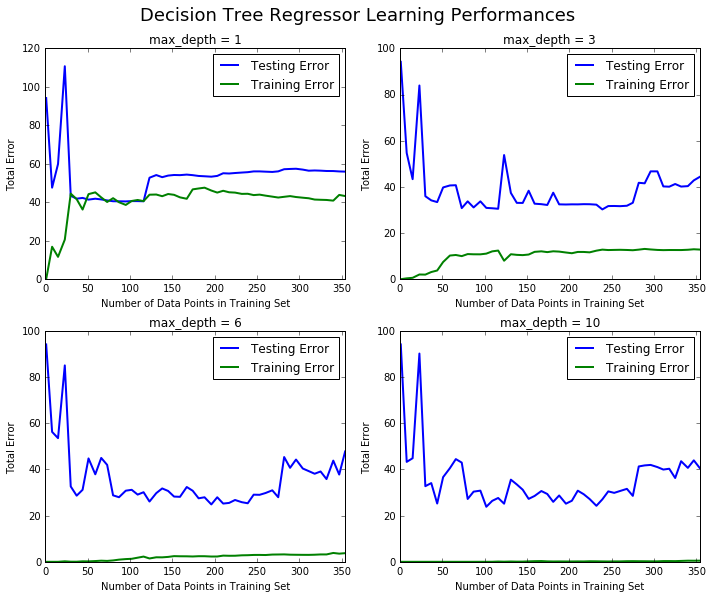

In [22]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **Max Depth is 10. As the size of the training set increases, the training error decreases non linearly,although initially its very low.
            The testing error,also decreases and increases in a constant pattern,one after the another with the increase in data points i the training set.When the training set is small, the trained model can essentially “memorize” all of the training data. As the training set gets larger, the model won’t be able to fit all of the training data exactly.
The opposite is happening with the test set. When the training set is small, then it’s more likely the model hasn’t seen similar data before. As the training set gets larger, it becomes more likely that the model has seen similar data before.
            

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **Model with max-depth 1 suffers from high bias as  whereas the model with max-depth 10 suffers from high variance. 

Creating a model complexity graph. . . 


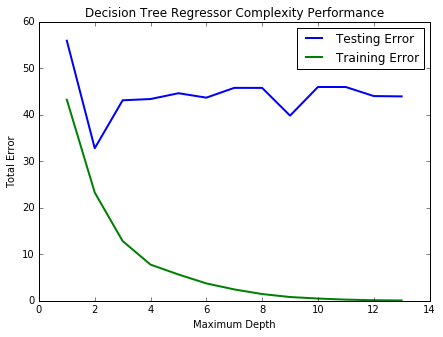

In [23]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **With th increase in max depth,training error decreases while the test error increases and decreases in a pattern.Based on my interpretation,I think the model with max depth equal to 4 OR 5 generalizes the best as it has a low training error as well a low test error.This trade off between training and test error seems to be best for the model with this max depth.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [24]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: **Final model has an optimal max_depth parameter of 4 as 13 is highly overfitting here, as the test error is well above our training error and we are basically just memorizing our data.


## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [25]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: **$21630.This seems to be good enough as it is very close to the median and mean house price calculated earlier.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **Though the accuracy is good,I would not use this model.I think it needs more helpful features like median household income,some metric to assess nearby facilities on their qauntity,quaility and availability,distance to nearest hospitals,entertainment venues such as movie theaters etc.